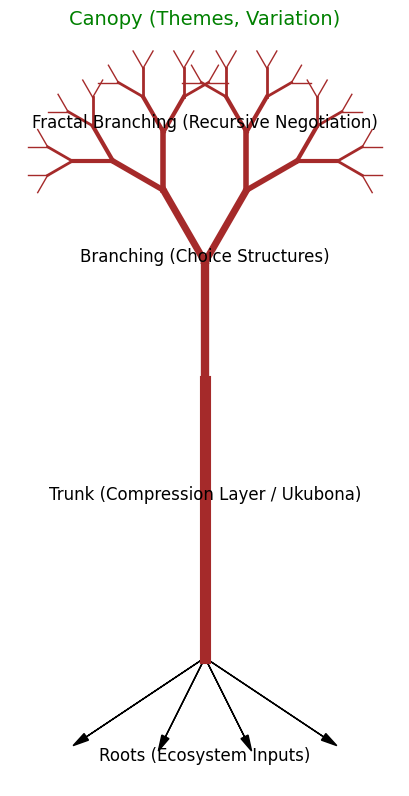

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_tree(ax, x, y, length, angle, depth, max_depth):
    if depth > max_depth:
        return
    x2 = x + length * np.cos(angle)
    y2 = y + length * np.sin(angle)

    ax.plot([x, x2], [y, y2], color='brown', linewidth=max(1, (max_depth - depth + 1)))

    # Recursively draw branches
    draw_tree(ax, x2, y2, length * 0.7, angle + np.pi / 6, depth + 1, max_depth)
    draw_tree(ax, x2, y2, length * 0.7, angle - np.pi / 6, depth + 1, max_depth)

fig, ax = plt.subplots(figsize=(8, 10))
ax.set_aspect('equal')
ax.axis('off')

# Draw roots as arrows
for i in range(-3, 4, 2):
    ax.arrow(0, -1.5, i*0.5, -1, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Draw trunk
ax.plot([0, 0], [-1.5, 2], color='brown', linewidth=8)

# Draw fractal branches
draw_tree(ax, 0, 2, 1.5, np.pi/2, 0, 5)

# Annotate symbolic regions
ax.text(0, 6.5, "Canopy (Themes, Variation)", ha='center', fontsize=14, color='green')
ax.text(0, 5.2, "Fractal Branching (Recursive Negotiation)", ha='center', fontsize=12)
ax.text(0, 3.5, "Branching (Choice Structures)", ha='center', fontsize=12)
ax.text(0, 0.5, "Trunk (Compression Layer / Ukubona)", ha='center', fontsize=12)
ax.text(0, -2.8, "Roots (Ecosystem Inputs)", ha='center', fontsize=12)

plt.show()


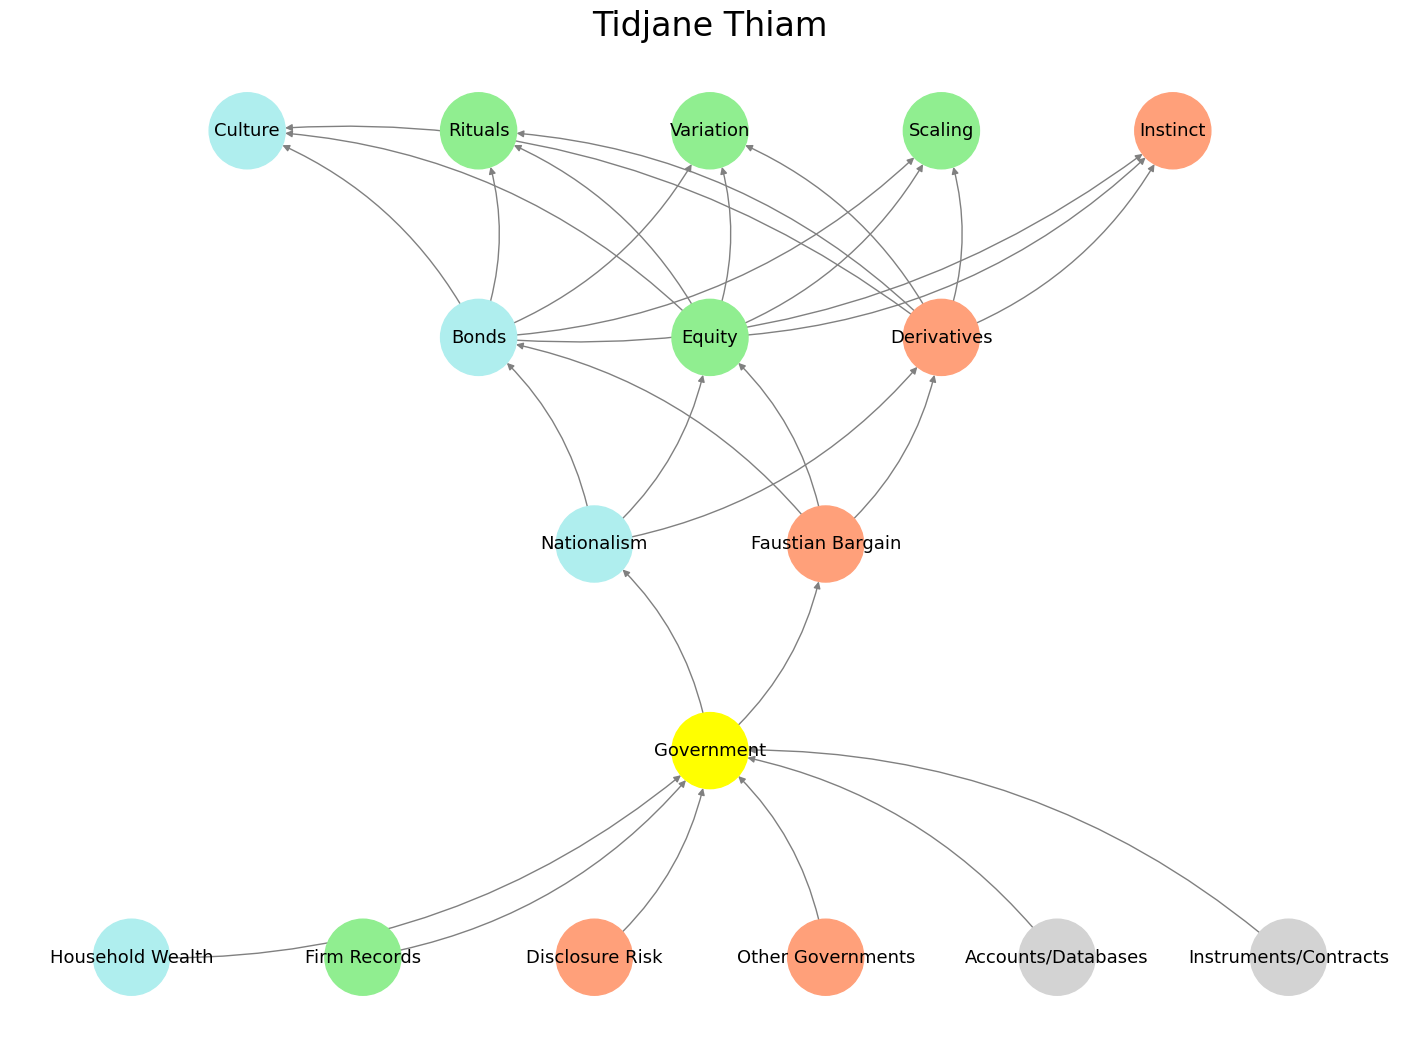

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

# Ensure the output directory exists
os.makedirs("images", exist_ok=True)

# Define the neural network fractal with updated labels
def define_layers():
    return {
        'Nonself': [
            'Household Wealth', 'Firm Records', 'Disclosure Risk', 
            'Other Governments', 'Accounts/Databases', 'Instruments/Contracts'
        ],
        'Self': ['Government'],  
        'Conflict': ['Nationalism', 'Faustian Bargain'],  
        'Negotiation': ['Bonds', 'Equity', 'Derivatives'],  
        "Flourishing": ['Culture', 'Rituals', 'Variation', 'Scaling', 'Instinct']  
    }

# Maintain color assignments with corrected node labels
def assign_colors():
    color_map = {
        'yellow': ['Government'],  
        'paleturquoise': ['Household Wealth', 'Nationalism', 'Bonds', 'Culture'],  
        'lightgreen': ['Firm Records', 'Equity', 'Scaling', 'Variation', 'Rituals'],  
        'lightsalmon': [
            'Disclosure Risk', 'Other Governments', 'Faustian Bargain',  
            'Derivatives', 'Instinct'
        ],
        'lightgray': ['Accounts/Databases', 'Instruments/Contracts']  # explicitly assign gray
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate centered x positions for nodes
def calculate_positions(layer, y_offset):
    x_positions = np.linspace(-((len(layer) - 1) / 2), ((len(layer) - 1) / 2), len(layer))
    return [(x, y_offset) for x in x_positions]

# Create and visualize the neural network graph (top-down orientation)
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign top-down positions
    for i, (layer_name, nodes) in enumerate(reversed(list(layers.items()))):
        y_offset = i * -2
        positions = calculate_positions(nodes, y_offset)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))

    # Add edges from Nonself (bottom) to Flourishing (top)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer = layer_names[i]
        target_layer = layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=13, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Tidjane Thiam", fontsize=24)

    # Save image
    plt.savefig("images/tidjane-thiam.jpeg", dpi=300, bbox_inches='tight')

# Run the visualization
visualize_nn()

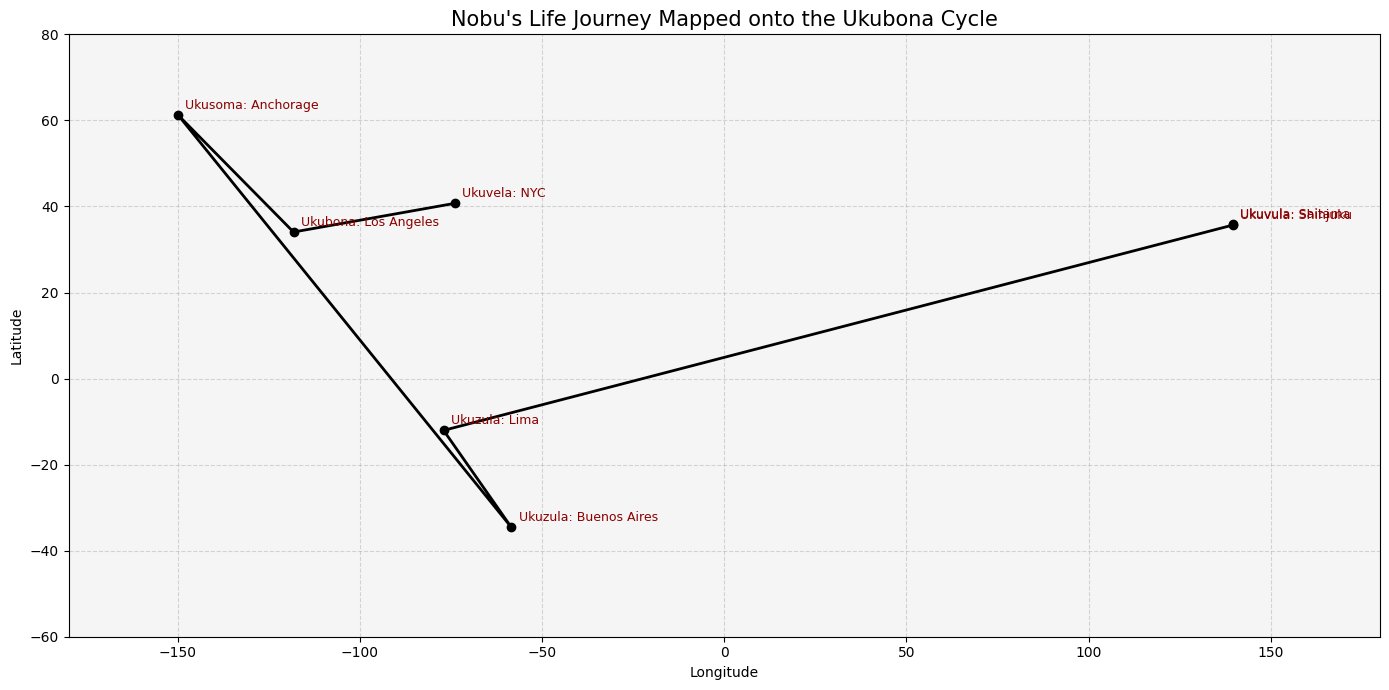

In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Define coordinates and labels again for plotting without geopandas
locations = [
    ("Ukuvula: Saitama", 139.6489, 35.8617),
    ("Ukuvula: Shinjuku", 139.7036, 35.6938),
    ("Ukuzula: Lima", -77.0428, -12.0464),
    ("Ukuzula: Buenos Aires", -58.4173, -34.6037),
    ("Ukusoma: Anchorage", -149.9003, 61.2181),
    ("Ukubona: Los Angeles", -118.2437, 34.0522),
    ("Ukuvela: NYC", -74.0094, 40.7163)
]

# Extract latitudes and longitudes
labels, lons, lats = zip(*locations)

# Plot the map background
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_facecolor('whitesmoke')
ax.plot(lons, lats, 'ko-', linewidth=2, markersize=6)

# Annotate each point
for label, lon, lat in locations:
    ax.text(lon + 2, lat + 1.5, label, fontsize=9, color='darkred')

# Axis formatting
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 80)
ax.set_title("Nobu's Life Journey Mapped onto the Ukubona Cycle", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("images/nobu-origins.jpeg", dpi=300, bbox_inches='tight')
plt.show()


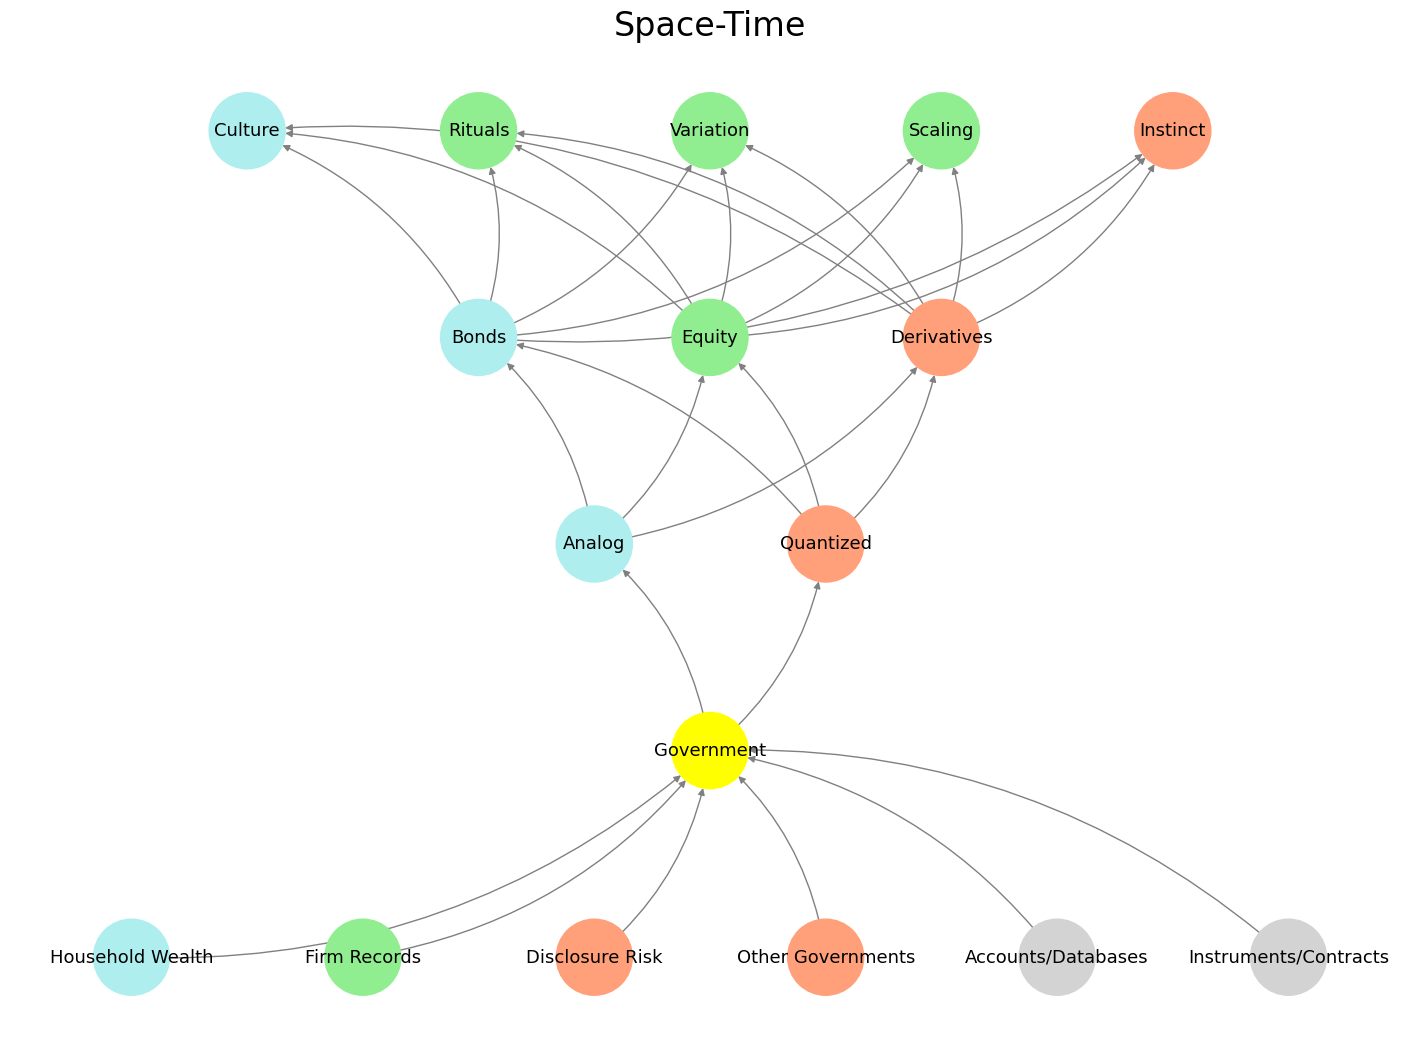

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

# Ensure the output directory exists
os.makedirs("images", exist_ok=True)

# Define the neural network fractal with updated labels
def define_layers():
    return {
        'Nonself': [
            'Household Wealth', 'Firm Records', 'Disclosure Risk', 
            'Other Governments', 'Accounts/Databases', 'Instruments/Contracts'
        ],
        'Self': ['Government'],  
        'Conflict': ['Analog', 'Quantized'],  
        'Negotiation': ['Bonds', 'Equity', 'Derivatives'],  
        "Flourishing": ['Culture', 'Rituals', 'Variation', 'Scaling', 'Instinct']  
    }

# Maintain color assignments with corrected node labels
def assign_colors():
    color_map = {
        'yellow': ['Government'],  
        'paleturquoise': ['Household Wealth', 'Analog', 'Bonds', 'Culture'],  
        'lightgreen': ['Firm Records', 'Equity', 'Scaling', 'Variation', 'Rituals'],  
        'lightsalmon': [
            'Disclosure Risk', 'Other Governments', 'Quantized',  
            'Derivatives', 'Instinct'
        ],
        'lightgray': ['Accounts/Databases', 'Instruments/Contracts']  # explicitly assign gray
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate centered x positions for nodes
def calculate_positions(layer, y_offset):
    x_positions = np.linspace(-((len(layer) - 1) / 2), ((len(layer) - 1) / 2), len(layer))
    return [(x, y_offset) for x in x_positions]

# Create and visualize the neural network graph (top-down orientation)
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign top-down positions
    for i, (layer_name, nodes) in enumerate(reversed(list(layers.items()))):
        y_offset = i * -2
        positions = calculate_positions(nodes, y_offset)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))

    # Add edges from Nonself (bottom) to Flourishing (top)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer = layer_names[i]
        target_layer = layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=13, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Space-Time", fontsize=24)

    # Save image
    plt.savefig("images/instinct-culture.jpeg", dpi=300, bbox_inches='tight')

# Run the visualization
visualize_nn()

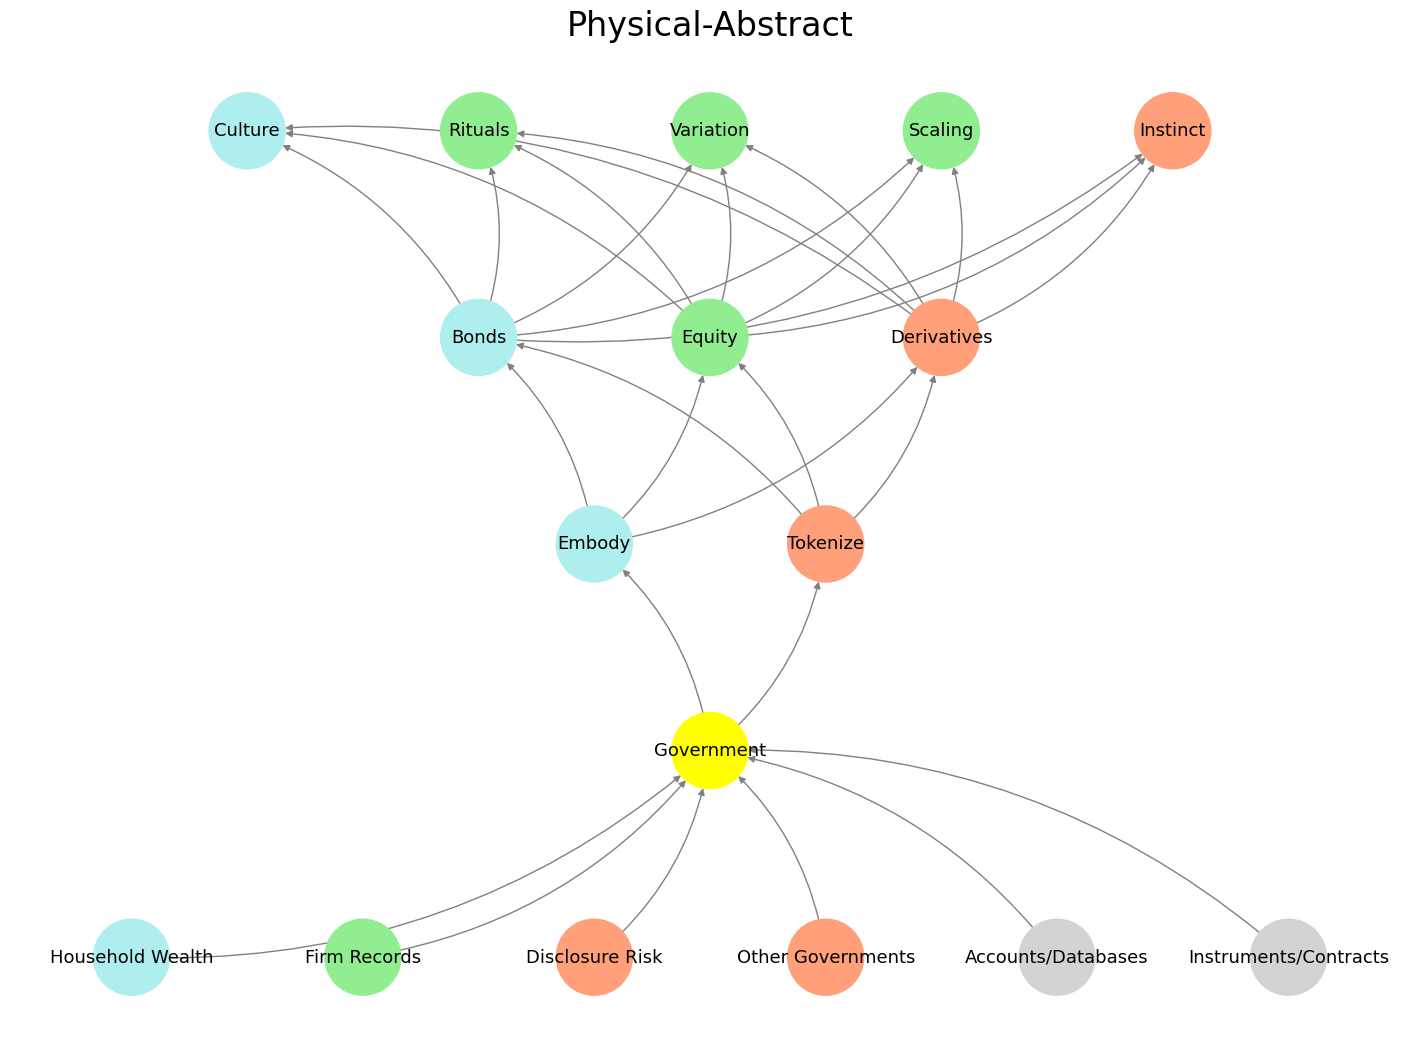

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

# Ensure the output directory exists
os.makedirs("images", exist_ok=True)

# Define the neural network fractal with updated labels
def define_layers():
    return {
        'Nonself': [
            'Household Wealth', 'Firm Records', 'Disclosure Risk', 
            'Other Governments', 'Accounts/Databases', 'Instruments/Contracts'
        ],
        'Self': ['Government'],  
        'Conflict': ['Embody', 'Tokenize'],  
        'Negotiation': ['Bonds', 'Equity', 'Derivatives'],  
        "Flourishing": ['Culture', 'Rituals', 'Variation', 'Scaling', 'Instinct']  
    }

# Maintain color assignments with corrected node labels
def assign_colors():
    color_map = {
        'yellow': ['Government'],  
        'paleturquoise': ['Household Wealth', 'Embody', 'Bonds', 'Culture'],  
        'lightgreen': ['Firm Records', 'Equity', 'Scaling', 'Variation', 'Rituals'],  
        'lightsalmon': [
            'Disclosure Risk', 'Other Governments', 'Tokenize',  
            'Derivatives', 'Instinct'
        ],
        'lightgray': ['Accounts/Databases', 'Instruments/Contracts']  # explicitly assign gray
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate centered x positions for nodes
def calculate_positions(layer, y_offset):
    x_positions = np.linspace(-((len(layer) - 1) / 2), ((len(layer) - 1) / 2), len(layer))
    return [(x, y_offset) for x in x_positions]

# Create and visualize the neural network graph (top-down orientation)
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign top-down positions
    for i, (layer_name, nodes) in enumerate(reversed(list(layers.items()))):
        y_offset = i * -2
        positions = calculate_positions(nodes, y_offset)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))

    # Add edges from Nonself (bottom) to Flourishing (top)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer = layer_names[i]
        target_layer = layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=13, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Physical-Abstract", fontsize=24)

    # Save image
    plt.savefig("images/embody-tokenize.jpeg", dpi=300, bbox_inches='tight')

# Run the visualization
visualize_nn()

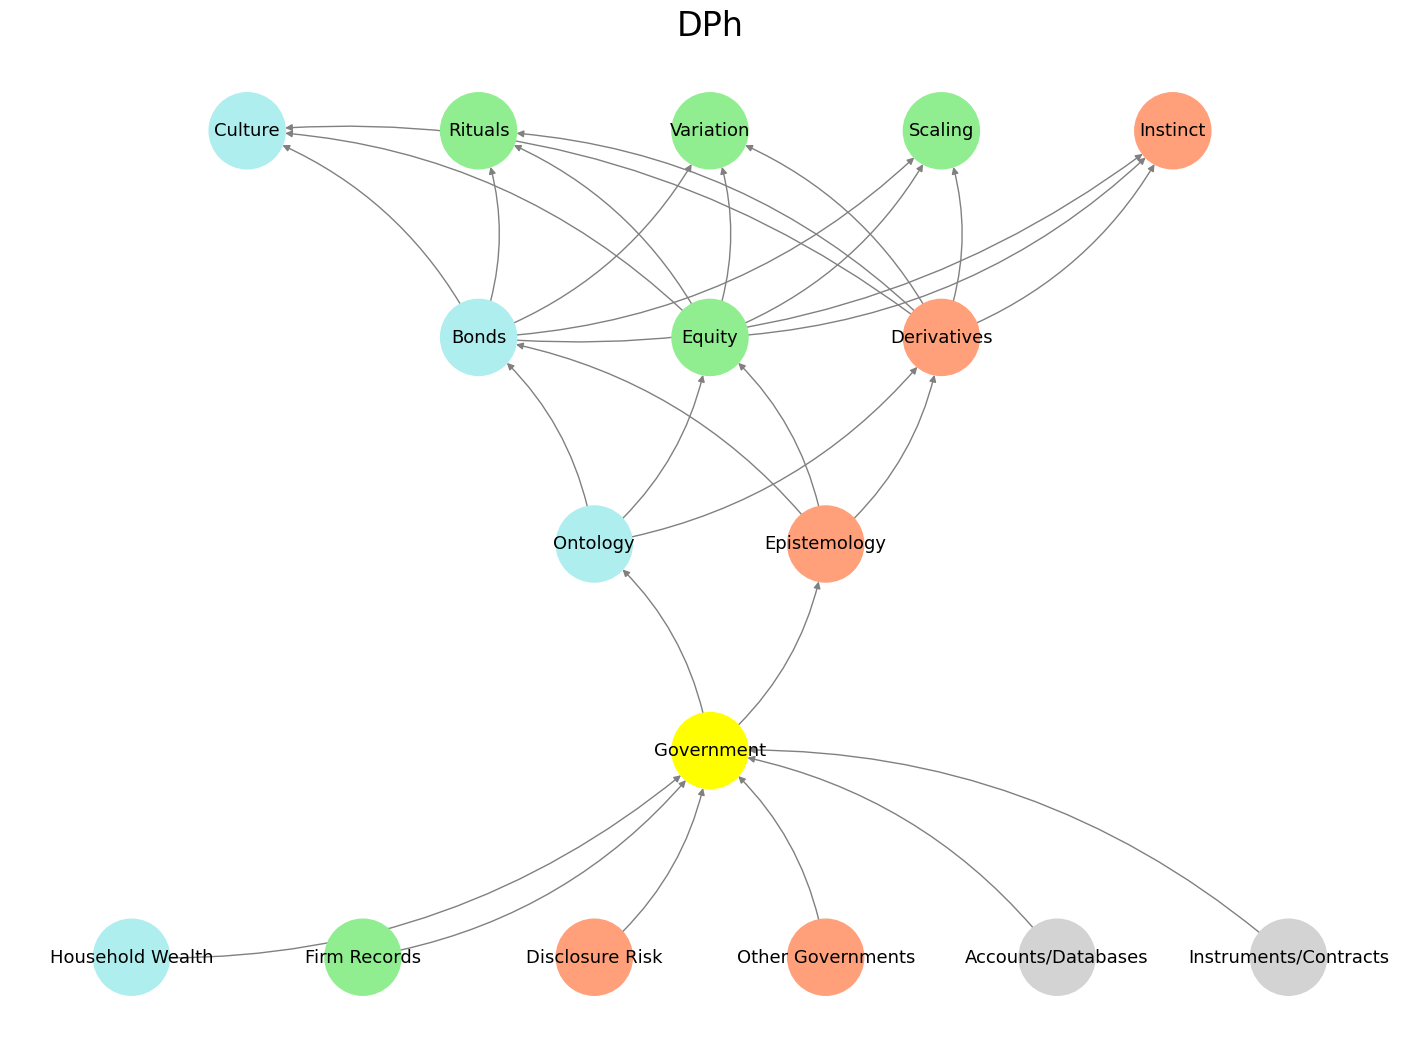

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

# Ensure the output directory exists
os.makedirs("images", exist_ok=True)

# Define the neural network fractal with updated labels
def define_layers():
    return {
        'Nonself': [
            'Household Wealth', 'Firm Records', 'Disclosure Risk', 
            'Other Governments', 'Accounts/Databases', 'Instruments/Contracts'
        ],
        'Self': ['Government'],  
        'Conflict': ['Ontology', 'Epistemology'],  
        'Negotiation': ['Bonds', 'Equity', 'Derivatives'],  
        "Flourishing": ['Culture', 'Rituals', 'Variation', 'Scaling', 'Instinct']  
    }

# Maintain color assignments with corrected node labels
def assign_colors():
    color_map = {
        'yellow': ['Government'],  
        'paleturquoise': ['Household Wealth', 'Ontology', 'Bonds', 'Culture'],  
        'lightgreen': ['Firm Records', 'Equity', 'Scaling', 'Variation', 'Rituals'],  
        'lightsalmon': [
            'Disclosure Risk', 'Other Governments', 'Epistemology',  
            'Derivatives', 'Instinct'
        ],
        'lightgray': ['Accounts/Databases', 'Instruments/Contracts']  # explicitly assign gray
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate centered x positions for nodes
def calculate_positions(layer, y_offset):
    x_positions = np.linspace(-((len(layer) - 1) / 2), ((len(layer) - 1) / 2), len(layer))
    return [(x, y_offset) for x in x_positions]

# Create and visualize the neural network graph (top-down orientation)
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign top-down positions
    for i, (layer_name, nodes) in enumerate(reversed(list(layers.items()))):
        y_offset = i * -2
        positions = calculate_positions(nodes, y_offset)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))

    # Add edges from Nonself (bottom) to Flourishing (top)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer = layer_names[i]
        target_layer = layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=13, connectionstyle="arc3,rad=0.2"
    )
    plt.title("DPh", fontsize=24)

    # Save image
    plt.savefig("images/ontology-epistemology.jpeg", dpi=300, bbox_inches='tight')

# Run the visualization
visualize_nn()